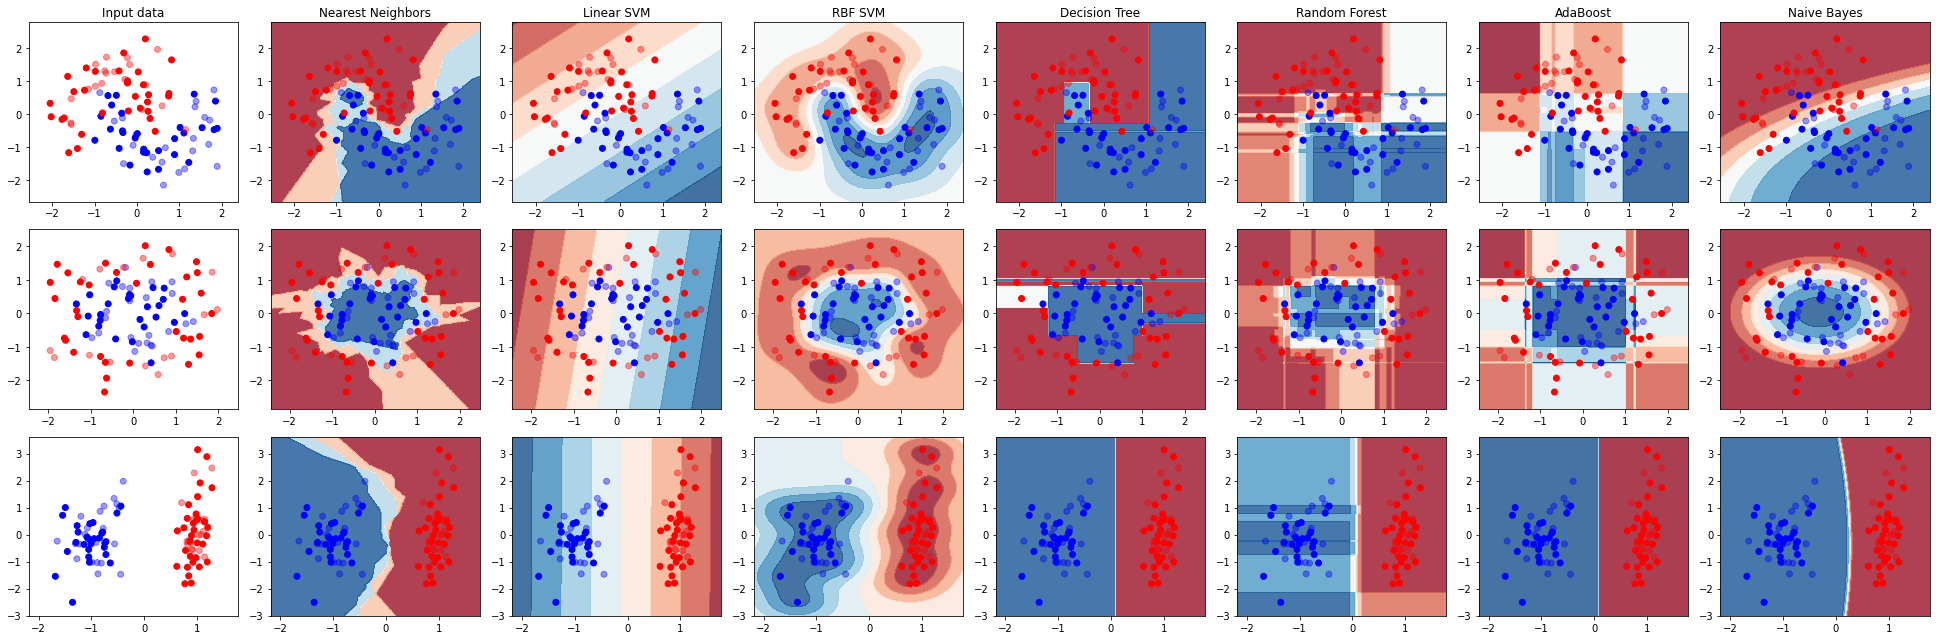

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest","AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel='rbf',gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    cm = plt.cm.RdBu
  
    plt.subplot(len(datasets),len(classifiers)+1,i)
    plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright)
    plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.4)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    if ds_cnt == 0:
        plt.title("Input data")
    i+=1
    
    for name, clf in zip(names, classifiers):
        plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        
        plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright)
        plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.4)
        plt.xlim(xx.min(),xx.max())
        plt.ylim(yy.min(),yy.max())
        
        if ds_cnt == 0:
            plt.title(name)
        
        i += 1

plt.tight_layout()
plt.show()

In [18]:
xx.ravel()

array([-2.18304789, -2.16304789, -2.14304789, ...,  1.73695211,
        1.75695211,  1.77695211])

In [19]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

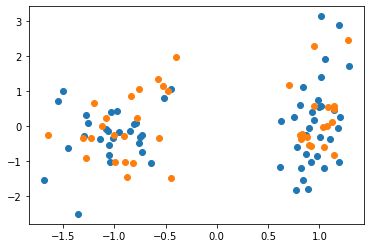

In [12]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(X_test[:,0],X_test[:,1])